In [2]:
# Modules required for computation
import numpy as np
import xarray as xr
import pandas as pd
import time
from glob import glob
from importlib import reload
import sys
import dask
from tqdm import tqdm

# Modules required for plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from IPython.display import display, HTML
import matplotlib.colors as colors
import cmaps as allcmaps

# Modules for feature extraction
scafet_folder = 'src/'
sys.path.append(scafet_folder)
import object_properties as obp
import ridge_detection as rd
import object_filtering as obf

In [27]:
grid_area = xr.open_dataset('resources/grid_area_era5.nc')
            # .sel(latitude=latslice,longitude=lonslice)
grid_area = grid_area.rename({'longitude':'lon'})
grid_area = grid_area.rename({'latitude':'lat'})
grid_area = grid_area.reindex\
    (lat=list(reversed(grid_area.lat)))
land = xr.open_dataset('resources/land_sea_mask_era5.nc')

In [20]:
ufile='http://apdrc.soest.hawaii.edu:80/dods/public_data/Reanalysis_Data/ERA5/hourly/U_wind_component_10m'
vfile='http://apdrc.soest.hawaii.edu:80/dods/public_data/Reanalysis_Data/ERA5/hourly/V_wind_component_10m'

In [21]:
uwind = xr.open_dataset(ufile).isel(time=slice(-10,-1))
vwind = xr.open_dataset(vfile).isel(time=slice(-10,-1))

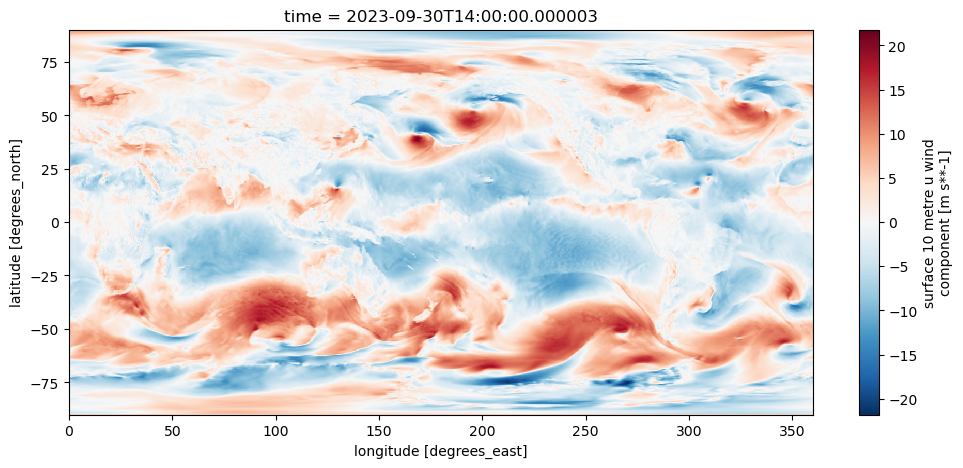

In [30]:
plt.figure(figsize=(12,5))
uwind['u10'].isel(time=0).plot()

In [29]:
uwind

<xarray.Dataset>
Dimensions:  (time: 9, lat: 721, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2023-09-30T14:00:00.000003 ... 2023-09-30T...
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Data variables:
    u10      (time, lat, lon) float32 ...
Attributes:
    title:          ERA5 hourly Surface 10 metre U wind component
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/ecmwf_ERA5.php
    history:        Fri Oct 06 06:38:59 HST 2023 : imported by GrADS Data Ser...